In [30]:
import face_recognition
from PIL import Image
import numpy as np
from io import BytesIO
import base64
from email.mime.image import MIMEImage

In [31]:
def crop_image(img, coordinates):
    top, right, bottom, left = coordinates
    box = (left, top, right, bottom)
    cropped_img = img.crop(box)
    return cropped_img


In [62]:
def getEncodings(imgBase64):
    im_bytes = base64.b64decode(imgBase64)
    im_file = BytesIO(im_bytes)  
    image = Image.open(im_file)
    image.show()
    load = np.array(image)
    face_locations = face_recognition.face_locations(load)
    print(face_locations)
    result = []
    for i in face_locations:
        cropped_img = crop_image(image, i)
        
        load = np.array(cropped_img)
        try:
            encoding = list(face_recognition.face_encodings(load)[0])
        except:
            cropped_img.show()
            print(face_recognition.face_encodings(load))
            continue
        img_byte_array = BytesIO()
        cropped_img.save(img_byte_array, format="JPEG")
        base64_image = base64.b64encode(img_byte_array.getvalue())
        result.append({"face":'data:image/JPEG;base64,' + str(base64_image)[2:-1], "encoding":encoding})
    return result

[(172, 664, 726, 110)]


[{'face': '',
  'encoding': [-0.17136827111244202,
   0.13513830304145813,
   0.10785692930221558,
   -0.031278591603040695,
   -0.15611587464809418,
   -0.06636889278888702,
   -0.017792467027902603,
   -0.16059409081935883,
   0.15612125396728516,
   -0.07311782240867615,
   0.11790937185287476,
   -0.09103149175643921,
   -0.31087327003479004,
   0.09845307469367981,
   -0.0709468424320221,
   0.11719407141208649,
   -0.15925833582878113,
   -0.11089541018009186,
   -0.15538732707500458,
   -0.10637720674276352,
   0.03267638757824898,
   0.09428807348012924,
   0.03497210517525673,
   0.07744210958480835,
   -0.060205116868019104,
   -0.2922394871711731,
   -0.04710223898291588,
   -0.070396788418293,
   -0.01227455772459507,
   -0.07669255137443542,
   0.012502332217991352,
   0.0942295491695404,
   -0.22064362466335297,
   -0.048645343631505966,
   -0.009401869028806686,
   0.06603887677192688,
   -0.082090362906456,
   -0.12492886930704117,
   0.12617307901382446,
   -0.07782304
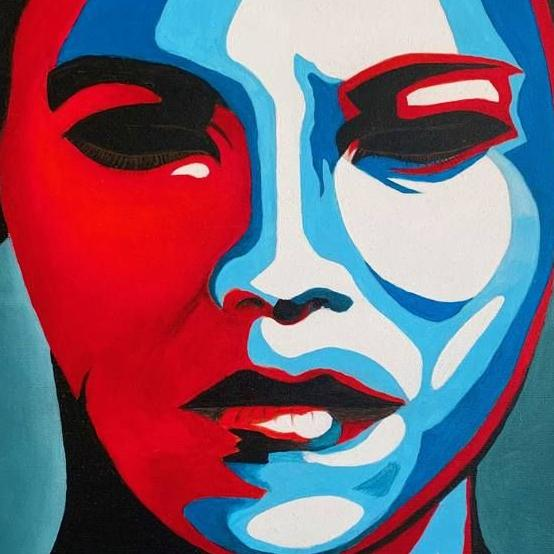

In [68]:
img = "faces/what.jpg"

with open(img, "rb") as f:
    imgBase64 = base64.b64encode(f.read())

a = getEncodings(imgBase64)
a

''
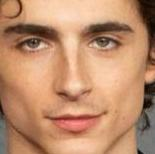

In [45]:
a["face 0"]["face"]

R0lGODlhDwAPAKECAAAAzMzM/////wAAACwAAAAADwAPAAACIISPeQHsrZ5ModrLl
N48CXF8m2iQ3YmmKqVlRtW4MLwWACH+H09wdGltaXplZCBieSBVbGVhZCBTbWFydFNhdmVyIQAAOw==
